In [1]:
import seaborn as sns
import pandas as pd

## Lendo o dataset

In [2]:
df0 = pd.read_csv('Bitcoin_tweets.csv')
df0.info()

/home/ffreller/.conda/envs/teste1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (4,5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830476 entries, 0 to 2830475
Data columns (total 13 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_name         object
 1   user_location     object
 2   user_description  object
 3   user_created      object
 4   user_followers    object
 5   user_friends      object
 6   user_favourites   object
 7   user_verified     object
 8   date              object
 9   text              object
 10  hashtags          object
 11  source            object
 12  is_retweet        object
dtypes: object(13)
memory usage: 280.7+ MB


In [3]:
df0.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [4]:
df0.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


Como o objetivo deste notebook é analisar o perfil dos usuário. vamos analisar as colunas referente ao usuário: user)name, user_location, user_description, user_followers, user_favourites, user_favourites e source.

## Analisar colunas

### user_verfified

In [5]:
df0['user_verified'].unique()

array(['False', 'True',
       "@krakenfx  #ETH #BTC  If you want to become poor, please don't buy #Bitcoin Obviously not financial advice. https://t.co/RstLTzN2MX",
       False, True,
       "Official ESHOP Airdrop. If You Missed Meme Token Rally, Don't Miss ESHOP.  Join Now: https://t.co/2dtf2Pqc55   Join our Telegram: https://t.co/aaOlDav2rT   @EShop_Token @elonmusk #cryptocurrency #BSC #Bitcoin #Ethereum #ETH #Airdrop #bounty #ESHOP  #Airdrops",
       '@pufferswap Nice project\n\n@karnoto_hendrik \n@ayubcandra12 \n@put_nab \n\n#YieldFarming #Airdrop #Binance #Bitcoin #pancakeswap #BNB #cryptocurrency #DeFi #BTC #BinanceSmartChain #BSC\n#pufferswap #DeFi #bsc #bnb #bitcoin #cryto #Airdrop #Airdrop',
       '#btc to the moon 🚀🚀 77774', '#btc to the moon 🚀🚀 46059',
       '@DogCakeFinance @DogCakeFinance Great project\nThis project will go to the moon 🚀🚀🚀\n\n@vandy_126 @Awan_MT @iqbalairun\n\n@DogCakeFinance #YieldFarming #Airdrop #PancakeSwap #Giveaway #BTC #BNB #Binance #BSC #cryp

Há algumas informações que não deveriam estar nessa coluna, que deveria ser do tipo bool

In [6]:
df0['user_verified'] = df0['user_verified'].apply(lambda x: (True if x=='True' else False) if type(x)==str else x).astype(bool)

### Date and user_created

In [7]:
df0['date'] = pd.to_datetime(df0['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df0['user_created'] = pd.to_datetime(df0['user_created'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [8]:
df0['user_created'].dt.year.value_counts(1)

2021.0    0.374883
2020.0    0.125697
2019.0    0.068889
2018.0    0.063094
2017.0    0.051204
2009.0    0.040868
2022.0    0.040382
2012.0    0.038946
2013.0    0.036354
2011.0    0.035431
2015.0    0.031554
2014.0    0.030559
2010.0    0.027313
2016.0    0.026324
2008.0    0.006794
2007.0    0.001650
2006.0    0.000055
1970.0    0.000002
Name: user_created, dtype: float64

In [22]:
sns.lineplot(df0['user_created'].dt.year.value_counts())

/home/ffreller/.conda/envs/teste1/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


A maioria dos usuários foi criada recentemente. Mais da metade dos usuários foi criada entre 2019 e 2022.

## source

In [9]:
## 10 fontes mais comuns no dataset e sua porcentagem no dataset
df0['source'].value_counts(1).head(10)*100

Twitter for Android    30.070449
Twitter Web App        25.771901
Twitter for iPhone     19.181794
IFTTT                   1.498025
dlvr.it                 1.152006
TweetDeck               0.780480
ContentStudio.io        0.764207
Twitter for iPad        0.611910
HoBaBot                 0.464743
Hootsuite Inc.          0.417268
Name: source, dtype: float64

Nota-se que android+iphone representam quase 50% das fontes de todos os tweets

In [10]:
top_10 = df0['source'].value_counts().head(10).index
# Transformando valores que não estão no top10 em "outros"
df0.loc[~df0['source'].isin(top_10), 'source'] = 'outros'
df0['source'] = pd.Categorical(df0['source'])
df0['source'].value_counts(1)*100

Twitter for Android    30.030567
Twitter Web App        25.737720
outros                 19.394264
Twitter for iPhone     19.156354
IFTTT                   1.496038
dlvr.it                 1.150478
TweetDeck               0.779445
ContentStudio.io        0.763193
Twitter for iPad        0.611099
HoBaBot                 0.464127
Hootsuite Inc.          0.416714
Name: source, dtype: float64

Fontes que não estão no top 10 representam 19% das fontes do dataset

### user_favourites

In [11]:
def clean_number_column(value):
    try:
        return float(value)
    except:
        return float("NaN")

In [12]:
df0['user_favourites'] = df0['user_favourites'].apply(clean_number_column)
df0['user_favourites'].describe().apply("{0:.5f}".format)

count    2830324.00000
mean        6580.72316
std        21247.94936
min            0.00000
25%           86.00000
50%          712.00000
75%         3826.00000
max      1248517.00000
Name: user_favourites, dtype: object

Os usuários têm uma média de 6580 favoritos. Mas olhando pra mediana (712), percebe-se que a distribuição é assimétrica positivamente.

In [13]:
#Retirando outliers para olhar melhor para o coluna
iqr = df0['user_favourites'].quantile(0.75) - df0['user_favourites'].quantile(0.25)
upper_limit = df0['user_favourites'].quantile(0.75) + iqr*3
df0.loc[df0['user_favourites']>upper_limit, 'user_favourites'] = upper_limit

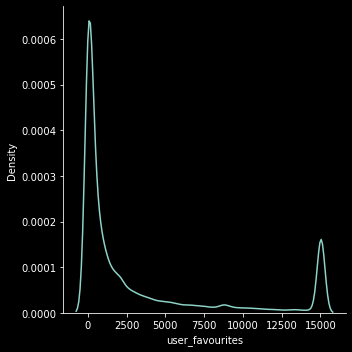

In [14]:
sns.displot(data=df0, x='user_favourites', kind='kde')

### user_friends

In [15]:
df0['user_friends'] = df0['user_friends'].apply(clean_number_column)
df0['user_friends'].describe().apply("{0:.5f}".format)

count    2830323.00000
mean        1198.50988
std         7185.96415
min            0.00000
25%           55.00000
50%          235.00000
75%          807.00000
max      4201104.00000
Name: user_friends, dtype: object

Assim como no caso dos favoritos, a média (1198) é bem maior que a mediana (235). Isso significa que a distribuição é assimétrica positivamente.

In [16]:
#Retirando outliers para olhar melhor para o coluna
iqr = df0['user_friends'].quantile(0.75) - df0['user_friends'].quantile(0.25)
upper_limit = df0['user_friends'].quantile(0.75) + iqr*3
df0.loc[df0['user_friends']>upper_limit, 'user_friends'] = upper_limit

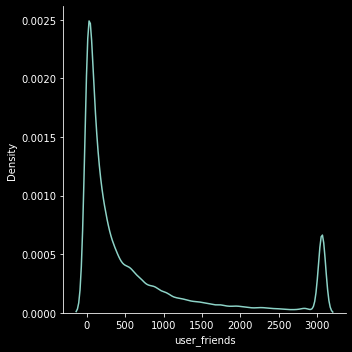

In [17]:
sns.displot(data=df0, x='user_friends', kind='kde')

### user_followers

In [18]:
df0['user_followers'] = df0['user_followers'].apply(clean_number_column)
df0['user_followers'].describe().apply("{0:.5f}".format)

count     2830337.00000
mean         8225.36444
std        104730.03091
min             0.00000
25%            45.00000
50%           205.00000
75%          1227.00000
max      24131346.00000
Name: user_followers, dtype: object

Assim como as outras duas variáveis numéria, temos uma distribuição positivamente assimétrica. Usuário têm média de 8225 seguidores, mas mediana de 205

In [19]:
#Retirando outliers para olhar melhor para o coluna
iqr = df0['user_followers'].quantile(0.75) - df0['user_friends'].quantile(0.25)
upper_limit = df0['user_followers'].quantile(0.75) + iqr*3
df0.loc[df0['user_followers']>upper_limit, 'user_followers'] = upper_limit

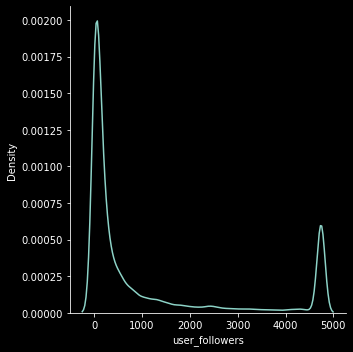

In [20]:
sns.displot(data=df0, x='user_followers', kind='kde')

# users_name
Vamos ver se conseguimos extrair informações sobre os usuários a partir dos nomes

In [21]:
df0['bitcoin_in_name'] = df0['user_name'].str.lower().str.contains('bitcoin')
df0['crypto_in_name'] = df0['user_name'].str.lower().str.contains('crypto')
df0['ethereum_in_name'] = df0['user_name'].str.lower().str.contains('ethereum')